## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

## Import Dataset

In [2]:
vivendo = pd.read_csv(r"C:\Users\Akunna Anyamkpa\Downloads\food_claims.csv")

## Check Column and Rows

In [3]:
vivendo.shape

(2000, 8)

## View Dataset

In [4]:
vivendo.head(4)

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat


## View Columns

In [5]:
vivendo.columns

Index(['claim_id', 'time_to_close', 'claim_amount', 'amount_paid', 'location',
       'individuals_on_claim', 'linked_cases', 'cause'],
      dtype='object')

## Dataset Summary

In [6]:
vivendo.describe()

,claim_id,time_to_close,amount_paid,individuals_on_claim
count,2000.000000,2000.00000,1964.000000,2000.000000
mean,1000.500000,185.56800,21541.975183,8.049500
std,577.494589,49.16339,12530.156509,4.087347
min,1.000000,76.00000,1516.720000,1.000000
25%,500.750000,158.00000,10995.950000,4.000000
50%,1000.500000,179.00000,20105.700000,8.000000
75%,1500.250000,204.00000,30709.350000,12.000000
max,2000.000000,518.00000,52498.750000,15.000000


## Check Data-types

In [7]:
vivendo.dtypes

claim_id                  int64
time_to_close             int64
claim_amount             object
amount_paid             float64
location                 object
individuals_on_claim      int64
linked_cases             object
cause                    object
dtype: object

## NUMBER ONE

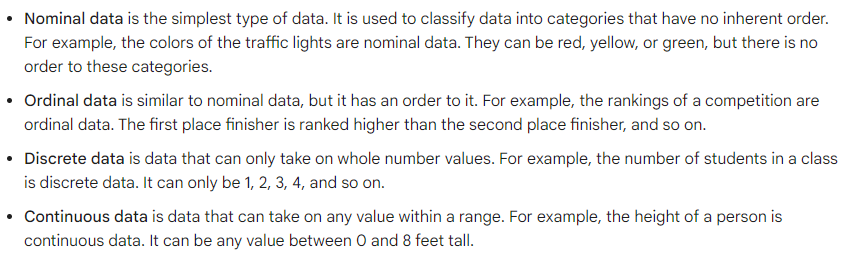

### A)

* claim_id is Nominal
* time_to_close	is Discrete
* ?claim_amount is Continuous
* amount_paid is Continuous
* location is Nominal
* individuals_on_claim is Discrete
* linked_cases is Nominal
* cause is Nominal

### B)

In [8]:
# Count the number of missing values per column
missing_values = vivendo.isnull().sum()

# Print the number of missing values per column
print(missing_values)

claim_id                 0
time_to_close            0
claim_amount             0
amount_paid             36
location                 0
individuals_on_claim     0
linked_cases            26
cause                    0
dtype: int64


### C)

### Remove the R dollar prefix

In [9]:
vivendo["claim_amount"] = vivendo["claim_amount"].str.replace("R\$", "").str.strip()

<ipython-input-9-dc6dd127d175>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  vivendo["claim_amount"] = vivendo["claim_amount"].str.replace("R\$", "").str.strip()


### Convert datatype to appropriate format

In [10]:
vivendo["claim_amount"] = pd.to_numeric(vivendo["claim_amount"], errors='coerce')

In [11]:
vivendo["claim_amount"]

0       74474.55
1       52137.83
2       24447.20
3       29006.28
4       19520.60
          ...   
1995    28982.30
1996     5188.44
1997    11975.85
1998    23516.28
1999     8051.40
Name: claim_amount, Length: 2000, dtype: float64

### AMOUNT_PAID
#### Replace missing values with the overall median amount paid

In [12]:
median_value = vivendo["amount_paid"].median()
vivendo["amount_paid"].fillna(median_value, inplace=True)

### LINKED_CASES
#### Replace missing values with FALSE

In [13]:
vivendo["linked_cases"].fillna("FALSE", inplace=True)

### Recheck for missing values

In [14]:
# Count the number of missing values per column
missing_values = vivendo.isnull().sum()

# Print the number of missing values per column
print(missing_values)

claim_id                0
time_to_close           0
claim_amount            0
amount_paid             0
location                0
individuals_on_claim    0
linked_cases            0
cause                   0
dtype: int64


## NUMBER TWO

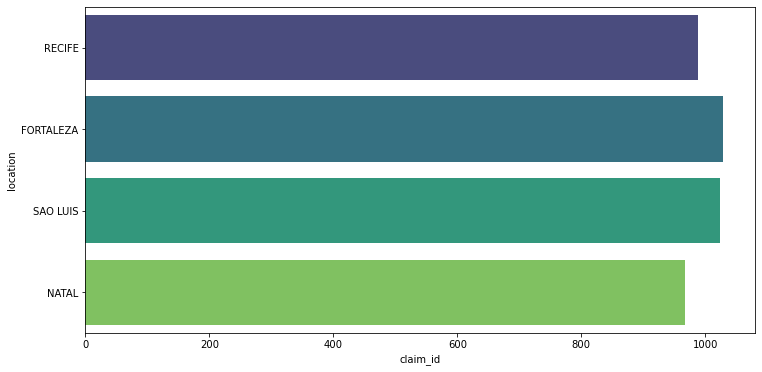

In [15]:
plt.figure(figsize = (12,6)) # To resize the plot

sns.barplot(x="claim_id", y="location", data=vivendo, palette='viridis', ci=None)
plt.show()

### A)

#### Fortaleza and Sao Luis State  location has the most claims

## NUMBER THREE

### Describe the distribution of time to close for all claims. Your answer must include a visualization that shows the distribution.

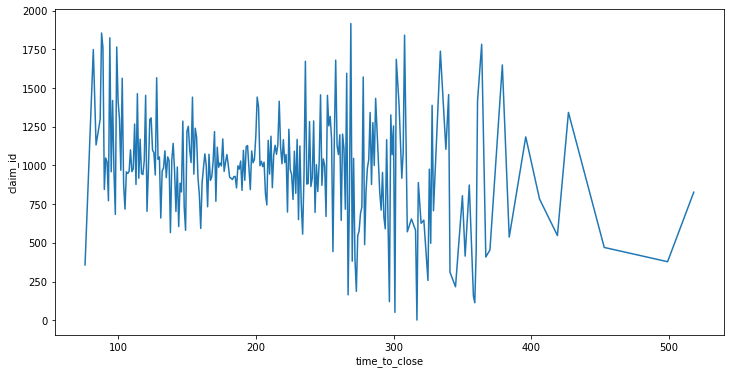

In [16]:
plt.figure(figsize = (12,6)) # To resize the plot

sns.lineplot(x="time_to_close", y="claim_id", data=vivendo, palette='viridis', ci=None)
plt.show()

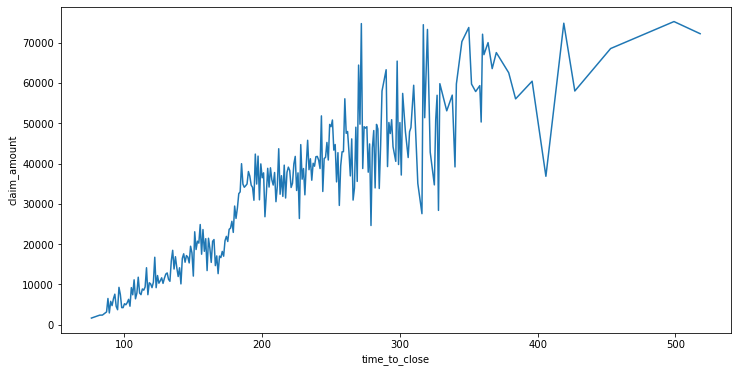

In [17]:
plt.figure(figsize = (12,6)) # To resize the plot

sns.lineplot(x="time_to_close", y="claim_amount", data=vivendo, palette='viridis', ci=None)
plt.show()

## NUMBER FOUR

### Describe the relationship between time to close and location. Your answer must include a visualization to demonstrate the relationship.

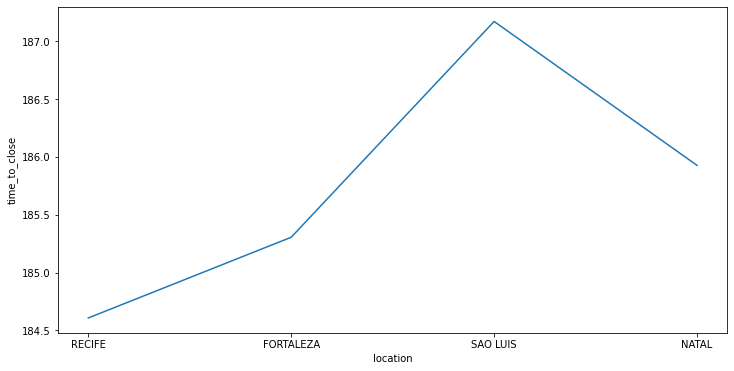

In [18]:
plt.figure(figsize = (12,6)) # To resize the plot

sns.lineplot(x="location", y="time_to_close", data=vivendo, palette='viridis', ci=None)
plt.show()